<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220703.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotnine as gg
from plotnine import ggplot, aes 
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# Regressor

In [3]:
raw = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
x = raw[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = raw['price']

In [6]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
x_ = x.copy()

In [17]:
x_ = x_.assign(yr_built = 2022 - x_['yr_built'],
          yr_renovated = lambda x : np.select([x['yr_renovated'].values >= 15, x['yr_renovated'] >= 1], ['old', 'new'], default = 'no')
          )

x_.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,67,no,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,71,old,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,89,no,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,57,no,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,35,no,98074,47.6168,-122.045,1800,7503


In [23]:
x1 = x_[['bedrooms', 'bathrooms',  'floors',
       'waterfront', 'view', 'condition', 'grade', 
       'yr_renovated']]
x2 = x_[['sqft_living', 'sqft_lot', 
       'sqft_above',
       'sqft_basement', 'yr_built',  'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

In [25]:
x1 = pd.get_dummies(x1, columns = ['bedrooms', 'bathrooms',  'floors',
       'waterfront', 'view', 'condition', 'grade', 
       'yr_renovated'])

In [40]:
x_ = pd.concat([x1, x2], axis = 1)
x_.head()

,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,...,yr_renovated_old,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,0,0,0,1,0,0,0,0,0,0,...,0,1180,5650,1180,0,67,47.5112,-122.257,1340,5650
1,0,0,0,1,0,0,0,0,0,0,...,1,2570,7242,2170,400,71,47.7210,-122.319,1690,7639
2,0,0,1,0,0,0,0,0,0,0,...,0,770,10000,770,0,89,47.7379,-122.233,2720,8062
3,0,0,0,0,1,0,0,0,0,0,...,0,1960,5000,1050,910,57,47.5208,-122.393,1360,5000
4,0,0,0,1,0,0,0,0,0,0,...,0,1680,8080,1680,0,35,47.6168,-122.045,1800,7503


In [83]:
x_tr, x_te, y_tr, y_te = train_test_split(x_, y, train_size = .7)

In [84]:
x_tr_1 = x_tr[['bedrooms_0', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
       'bedrooms_10', 'bedrooms_11', 'bedrooms_33', 'bathrooms_0.0',
       'bathrooms_0.5', 'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25',
       'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25',
       'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25',
       'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25',
       'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25',
       'bathrooms_5.5', 'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25',
       'bathrooms_6.5', 'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75',
       'bathrooms_8.0', 'floors_1.0', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'floors_3.5', 'waterfront_0', 'waterfront_1', 'view_0',
       'view_1', 'view_2', 'view_3', 'view_4', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_1', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'yr_renovated_no',
       'yr_renovated_old']]
x_tr_2 = x_tr[['sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']]
x_te_1 = x_te[['bedrooms_0', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
       'bedrooms_10', 'bedrooms_11', 'bedrooms_33', 'bathrooms_0.0',
       'bathrooms_0.5', 'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25',
       'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25',
       'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25',
       'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25',
       'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25',
       'bathrooms_5.5', 'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25',
       'bathrooms_6.5', 'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75',
       'bathrooms_8.0', 'floors_1.0', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'floors_3.5', 'waterfront_0', 'waterfront_1', 'view_0',
       'view_1', 'view_2', 'view_3', 'view_4', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_1', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'yr_renovated_no',
       'yr_renovated_old']]
x_te_2 = x_te[['sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']]

In [85]:
x_tr = pd.concat([x_tr_1, x_tr_2],axis = 1)
x_te = pd.concat([x_te_1, x_te_2],axis = 1)

In [86]:
scaler = RobustScaler()

In [87]:
x_tr_2 = pd.DataFrame(scaler.fit_transform(x_tr_2), columns = x_tr_2.columns)
x_te_2 = pd.DataFrame(scaler.transform(x_tr_2), columns = x_tr_2.columns)

In [88]:
x_tr_std = pd.concat([x_tr_1, x_tr_2], axis = 1)
x_te_std = pd.concat([x_te_1, x_te_2], axis = 1)

In [91]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [93]:
pred_lm = fit_lm.predict(x_te)
pred_rf = fit_lm.predict(x_te)

In [94]:
mean_squared_error(y_te, pred_lm), mean_squared_error(y_te, pred_rf)

(37281279090.45155, 37281279090.45155)

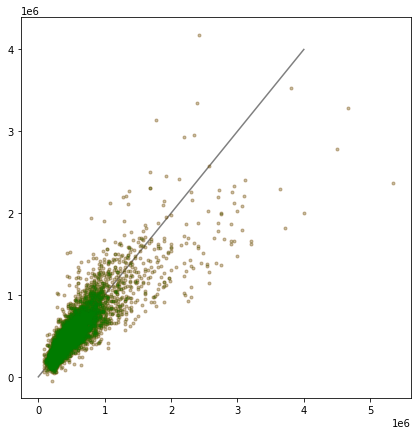

In [101]:
plt.figure(figsize = [7,7])
plt.plot([0, 4e6], [0, 4e6], color = 'gray')
plt.plot(y_te, pred_lm, '.', color = 'red', alpha = .2)
plt.plot(y_te, pred_rf, '.', color = 'green', alpha = .2)

# customer analysis

In [103]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 'test.csv',
 'sample_submission.csv',
 'retail_data_response.csv',
 'item_categories.csv',
 'ecommerce-data.csv',
 'rfm_test.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'retail_data_transactions.csv',
 'items.csv',
 'shops.csv',
 '.Rhistory',
 'sales_train.csv',
 'listings.csv',
 'sample_data']

In [124]:
df = pd.read_excel('online_retail_II.xlsx')

In [125]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [127]:
df.columns = [a.replace(' ', '_').lower() for a in df.columns]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [128]:
df = df[['invoice', 'country','customer_id','invoicedate', 'quantity', 'price']].assign(invoice = df['invoice'].astype(str))
df.head()

,invoice,country,customer_id,invoicedate,quantity,price
0,489434,United Kingdom,13085.0,2009-12-01 07:45:00,12,6.95
1,489434,United Kingdom,13085.0,2009-12-01 07:45:00,12,6.75
2,489434,United Kingdom,13085.0,2009-12-01 07:45:00,12,6.75
3,489434,United Kingdom,13085.0,2009-12-01 07:45:00,48,2.10
4,489434,United Kingdom,13085.0,2009-12-01 07:45:00,24,1.25


In [129]:
df = df[(~df['invoice'].str.contains('C')) & (df['country'] == 'United Kingdom')]
df.head()

,invoice,country,customer_id,invoicedate,quantity,price
0,489434,United Kingdom,13085.0,2009-12-01 07:45:00,12,6.95
1,489434,United Kingdom,13085.0,2009-12-01 07:45:00,12,6.75
2,489434,United Kingdom,13085.0,2009-12-01 07:45:00,12,6.75
3,489434,United Kingdom,13085.0,2009-12-01 07:45:00,48,2.10
4,489434,United Kingdom,13085.0,2009-12-01 07:45:00,24,1.25


In [133]:
df = df.assign(rev = df['quantity'] * df['price']).rename(columns = {'customer_id' : 'id', 'invoicedate' : 'date'}).reindex(columns = {'id', 'date', 'rev'})
df.head()

,date,rev,id
0,2009-12-01 07:45:00,83.4,13085.0
1,2009-12-01 07:45:00,81.0,13085.0
2,2009-12-01 07:45:00,81.0,13085.0
3,2009-12-01 07:45:00,100.8,13085.0
4,2009-12-01 07:45:00,30.0,13085.0


In [134]:
df['date'] = df['date'].to_numpy().astype('datetime64[D]')
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df.head()

,date,rev,id,month
0,2009-12-01,83.4,13085.0,2009-12-01
1,2009-12-01,81.0,13085.0,2009-12-01
2,2009-12-01,81.0,13085.0,2009-12-01
3,2009-12-01,100.8,13085.0,2009-12-01
4,2009-12-01,30.0,13085.0,2009-12-01


In [135]:
df = df.groupby(['id', 'month', 'date'])['rev'].sum().reset_index()
df.head()

,id,month,date,rev
0,12346.0,2009-12-01,2009-12-14,90.0
1,12346.0,2009-12-01,2009-12-18,23.5
2,12346.0,2010-01-01,2010-01-04,45.0
3,12346.0,2010-01-01,2010-01-14,22.5
4,12346.0,2010-01-01,2010-01-22,22.5


In [144]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1, 0])
info_m = info_m.groupby('id').head(3)
info_m = info_m.groupby('id')['money'].sum().reset_index()
info_m.head()

,id,money
0,12346.0,0.00
1,12608.0,415.79
2,12745.0,0.00
3,12746.0,0.00
4,12747.0,1801.06


In [145]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'], ascending = [1, 0])
info_f = info_f.groupby('id').head(3)
info_f = info_f.groupby('id')['freq'].sum().reset_index()
info_f.head()

,id,freq
0,12346.0,0.0
1,12608.0,1.0
2,12745.0,0.0
3,12746.0,0.0
4,12747.0,4.0


In [146]:
df['date'].max()

Timestamp('2010-12-09 00:00:00')

In [147]:
date_now = datetime(2010,12,31)

In [150]:
info_r = df.groupby(['id']).agg({'date' : lambda x : (date_now - x.max()).days}).reset_index().rename(columns = {'date':'recency'})

In [152]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,12346.0,186,0.0,0.00
1,12608.0,61,1.0,415.79
2,12745.0,143,0.0,0.00
3,12746.0,197,0.0,0.00
4,12747.0,26,4.0,1801.06


In [154]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('12345')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('54321'))
            )
info.head()

,id,recency,freq,money,r,f,m
0,12346.0,186,0.0,0.00,4,5,5
1,12608.0,61,1.0,415.79,3,4,2
2,12745.0,143,0.0,0.00,4,5,5
3,12746.0,197,0.0,0.00,4,5,5
4,12747.0,26,4.0,1801.06,1,1,1


In [155]:
info.assign(rf = info['r'].astype(str) + info['f'].astype(str))

,id,recency,freq,money,r,f,m,rf
0,12346.0,186,0.0,0.00,4,5,5,45
1,12608.0,61,1.0,415.79,3,4,2,34
2,12745.0,143,0.0,0.00,4,5,5,45
3,12746.0,197,0.0,0.00,4,5,5,45
4,12747.0,26,4.0,1801.06,1,1,1,11
...,...,...,...,...,...,...,...,...
3966,18283.0,39,1.0,195.35,2,2,3,22
3967,18284.0,88,1.0,461.68,3,2,2,32
3968,18285.0,317,0.0,0.00,5,4,4,54
3969,18286.0,133,0.0,0.00,4,4,4,44
